<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q1-PLN/blob/main/2023_Q1_PLN_Notebook_House_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q1]**
Prof. Alexandre Donizeti Alves

## **PROJETO PRÁTICO [Série House]**
---



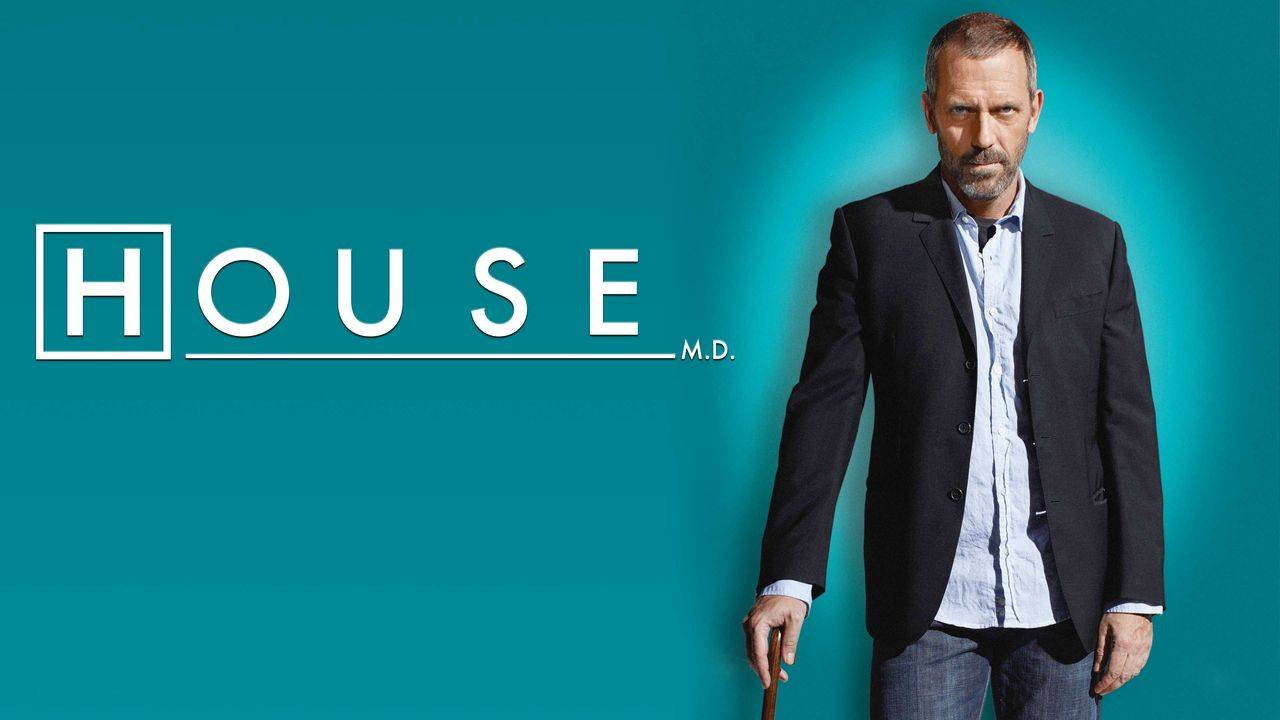

A série **House** é um drama médico americano que foi transmitido pela primeira vez em 2004 e durou até 2012. A série segue o Dr. Gregory House, um médico brilhante, mas altamente controverso, que lidera uma equipe de diagnóstico no fictício Hospital Universitário de Princeton-Plainsboro, em Nova Jersey.

Cada episódio da série apresenta um paciente que apresenta sintomas inexplicáveis e a equipe de House trabalha para descobrir o diagnóstico correto. O personagem principal, House, é conhecido por sua personalidade excêntrica, humor sarcástico e habilidade incomparável em diagnosticar doenças raras e complicadas.

Além dos casos médicos, a série também explora a vida pessoal de House, incluindo seus problemas de saúde, dependência de analgésicos, relacionamentos tumultuados e conflitos com a autoridade hospitalar.

**House** se tornou uma das séries de TV mais populares dos anos 2000, ganhando vários prêmios e indicações. A série é considerada um marco na televisão americana e influenciou muitas outras séries médicas e dramas de TV subsequentes.

A série **House** teve um total de 8 temporadas, que foram exibidas de 2004 a 2012. A primeira temporada estreou em novembro de 2004 e a última temporada terminou em maio de 2012, totalizando 177 episódios. Cada temporada da série apresenta um enredo autônomo, além de arcos de história de longa duração que se estendem por várias temporadas. 

A série "House" apresenta um grande elenco de personagens, mas os principais incluem:

   * Dr. Gregory House: personagem principal da série, interpretado por Hugh Laurie, um médico brilhante e controverso que lidera a equipe de diagnóstico do Hospital Universitário de Princeton-Plainsboro.

   * Dra. Lisa Cuddy: interpretada por Lisa Edelstein, é a administradora do hospital onde House trabalha e frequentemente entra em conflito com ele devido a seus métodos pouco convencionais.

   * Dr. James Wilson: interpretado por Robert Sean Leonard, é o melhor amigo e confidente de House. Ele é o chefe do departamento de oncologia do hospital.

   * Dr. Eric Foreman: interpretado por Omar Epps, é um neurologista que trabalha na equipe de diagnóstico de House.

   * Dra. Allison Cameron: interpretada por Jennifer Morrison, é uma imunologista e membro da equipe de diagnóstico.

   * Dr. Robert Chase: interpretado por Jesse Spencer, é um intensivista e membro da equipe de diagnóstico.

Esses são os principais personagens da série "House", mas há muitos outros personagens recorrentes e episódicos que aparecem ao longo das oito temporadas.

**Conjunto de Dados**

As transcrições de todos os episódios das 8 temporadas da série **House** foram obtidas a partir do seguinte site:

  https://clinic-duty.livejournal.com/12225.html

Para abrir um arquivo zip armazenado no Google Drive sem autenticar, você precisará do ID do arquivo zip.

In [ ]:
import requests
import zipfile
from io import BytesIO

# ID do arquivo zip no Google Drive
file_id = "1_rAzomhikVwtK32LV_yGhTKGuUsoEQ10"

# URL de download do arquivo zip
url = f"https://drive.google.com/uc?id={file_id}&export=download"

# Faz o download do arquivo zip
response = requests.get(url)
file_bytes = BytesIO(response.content)

# Extrai o arquivo zip
with zipfile.ZipFile(file_bytes, "r") as zip_ref:
    zip_ref.extractall()

Neste exemplo, usamos a biblioteca `requests` para baixar o arquivo zip do Google Drive e armazená-lo em um objeto `BytesIO`, que permite que a biblioteca `zipfile` leia o arquivo zip diretamente da memória. Em seguida, usamos a função `ZipFile` da biblioteca `zipfile` para extrair o conteúdo do arquivo zip. O parâmetro `r` indica que estamos abrindo o arquivo zip em modo de leitura.

**IMPORTANTE**: Lembre-se de que, para usar a API do Google Drive para baixar um arquivo sem autenticar, o arquivo precisa ser compartilhado publicamente ou com um link compartilhável. Caso contrário, será necessário autenticar com uma conta do Google que tenha permissão para acessar o arquivo.

In [ ]:
import pandas as pd

# Lê o arquivo Excel em um DataFrame
df = pd.read_excel('/content/house_season_1-8.xlsx')

# Exibe as 5 primeiras linhas do DataFrame
df.head()

,season,num_episode,episode,title,director,character,transcript
0,1,1,1.01,Pilot,Bryan Singer,Melanie,Why are you late?
1,1,1,1.01,Pilot,Bryan Singer,Rebecca,You’re not going to like the answer.
2,1,1,1.01,Pilot,Bryan Singer,Melanie,I already know the answer.
3,1,1,1.01,Pilot,Bryan Singer,Rebecca,I missed the bus.
4,1,1,1.01,Pilot,Bryan Singer,Melanie,"I don’t doubt it, no bus stops near Brad’s. Yo..."


In [ ]:
# Exibe as 5 últimas linhas do DataFrame
df.tail()

,season,num_episode,episode,title,director,character,transcript
76460,8,177,8.22,Everybody Dies,David Shore,House,Just switched the dental records.
76461,8,177,8.22,Everybody Dies,David Shore,Wilson,You're destroying your entire life. You can't ...
76462,8,177,8.22,Everybody Dies,David Shore,House,"I'm dead, Wilson. How do you want to spend you..."
76463,8,177,8.22,Everybody Dies,David Shore,Wilson,When the cancer starts getting really bad…
76464,8,177,8.22,Everybody Dies,David Shore,House,Cancer's boring.


**Análise Exploratória dos Dados**

In [ ]:
# Verifica valores nulos por coluna
print(df.isnull().sum())

season         0
num_episode    0
episode        0
title          0
director       0
character      0
transcript     0
dtype: int64


In [ ]:
# substituindo valores vazios por NaN
#df = df.replace('', pd.NaT)

# removendo valores nulos
#df = df.dropna()

**`Temporadas`**

In [ ]:
# Obtém os valores únicos da coluna "season"
unique_seasons = df['season'].unique()
unique_seasons

array([1, 2, 3, 4, 5, 6, 7, 8])

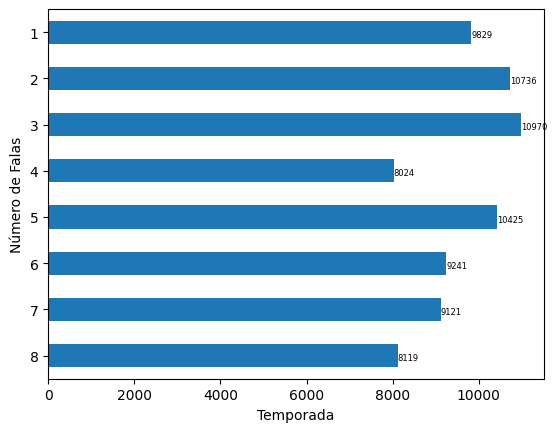

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por temporada e contar o número de transcrições em cada temporada
transcripts_por_season = df.groupby("season")["transcript"].count().sort_index(ascending=False)

# Plotar o gráfico
ax = transcripts_por_season.plot(kind="barh")
plt.xlabel("Temporada")
plt.ylabel("Número de Falas")

# Adicionar o número de transcrições no gráfico
for i, v in enumerate(transcripts_por_season):
  ax.text(v + 1.5, i - 0.1, str(v), fontsize=6)

plt.show()

In [ ]:
# Obtém o número de atores distintos por temporada
num_actors_per_season = df.groupby('season')['character'].nunique()

# Imprime o resultado por temporada
for season, num_actors in num_actors_per_season.items():
    print(f'Na temporada {season} há {num_actors} atores distintos')

Na temporada 1 há 236 atores distintos
Na temporada 2 há 166 atores distintos
Na temporada 3 há 177 atores distintos
Na temporada 4 há 142 atores distintos
Na temporada 5 há 177 atores distintos
Na temporada 6 há 237 atores distintos
Na temporada 7 há 218 atores distintos
Na temporada 8 há 211 atores distintos


In [ ]:
# Agrupa os dados por temporada e nome, conta as ocorrências e classifica em ordem decrescente
grouped = df.groupby(['season', 'character'])['character'].count().reset_index(name='count')
grouped = grouped.sort_values(['season', 'count'], ascending=[True, False])

# Seleciona os nomes mais comuns em cada temporada
for season in grouped['season'].unique():
    top_names = grouped[grouped['season'] == season]['character'].values[:6]
    print(f'Temporada {season}: {", ".join(top_names)}')

Temporada 1: House, Foreman, Chase, Cameron, Wilson, Cuddy
Temporada 2: House, Foreman, Cameron, Chase, Wilson, Cuddy
Temporada 3: House, Foreman, Cameron, Chase, Wilson, Cuddy
Temporada 4: House, Wilson, Foreman, Taub, Kutner, Thirteen
Temporada 5: House, Taub, Thirteen, Foreman, Kutner, Wilson
Temporada 6: House, Wilson, Foreman, Chase, Thirteen, Taub
Temporada 7: House, Taub, Masters, Foreman, Chase, Cuddy
Temporada 8: House, Adams, Chase, Park, Taub, Wilson


In [ ]:
cores = {'House': '#4e79a7', 'Foreman': '#e15759', 'Chase': '#f28e2b', 
         'Cameron': '#76b7b2', 'Wilson': '#59a14f', 'Cuddy': '#edc948',
         'Taub': '#9c755f', 'Kutner': '#ff9da7', 'Thirteen': '#b07aa1',
         'Masters': '#bab0ac', 'Park': '#A2E4B8', 'Adams': '#E4B8A2',
         'Amber': '#87CEFA'}

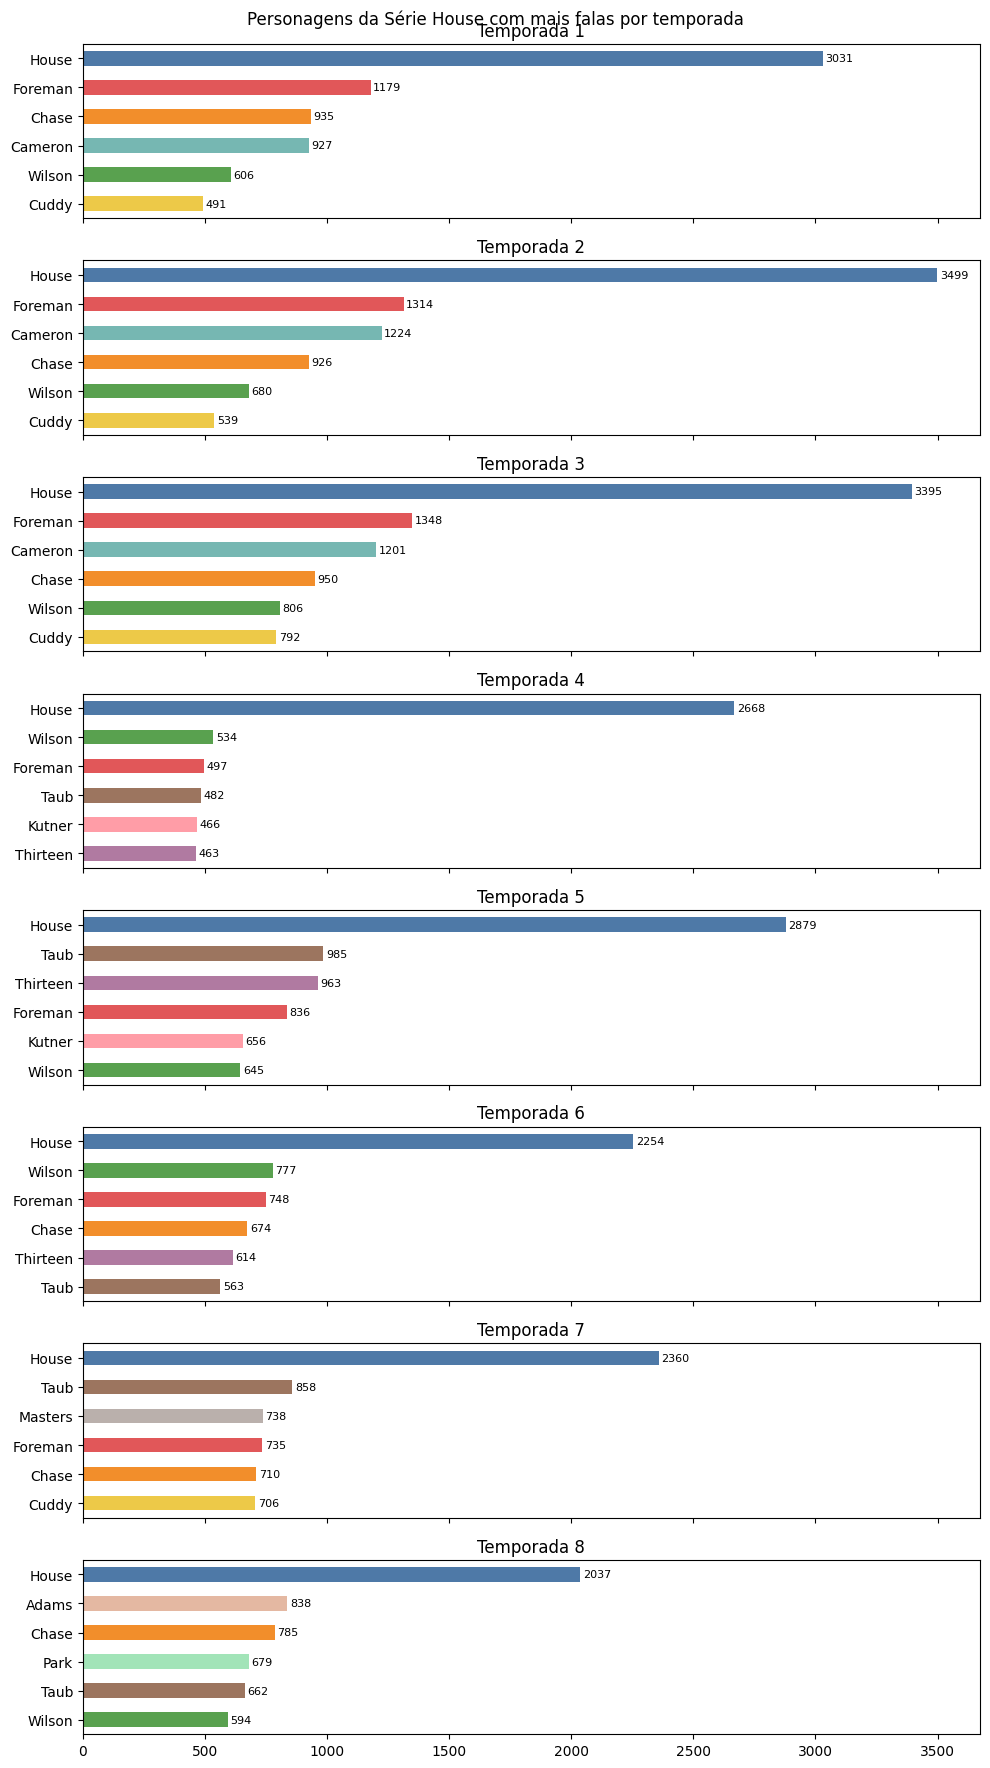

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(10,18), sharex=True)

for season in grouped['season'].unique():
     # Seleciona as linhas correspondentes à temporada desejada e apenas as colunas "season" e "character"
    season_df = df.loc[df['season'] == season, ['season', 'character']]
    top_names = season_df['character'].value_counts().head(6)[::-1]
    colors = [cores[c] for c in top_names.index]
    ax = top_names.plot.barh(ax=axes[season-1], title='Temporada ' + str(season), color=colors)

    # Adiciona o número de falas na frente de cada barra
    for i, v in enumerate(top_names):
       ax.text(v + 10, i - 0.1, str(v), color='black', fontsize=8)

fig.suptitle("Personagens da Série House com mais falas por temporada")
fig.tight_layout()    

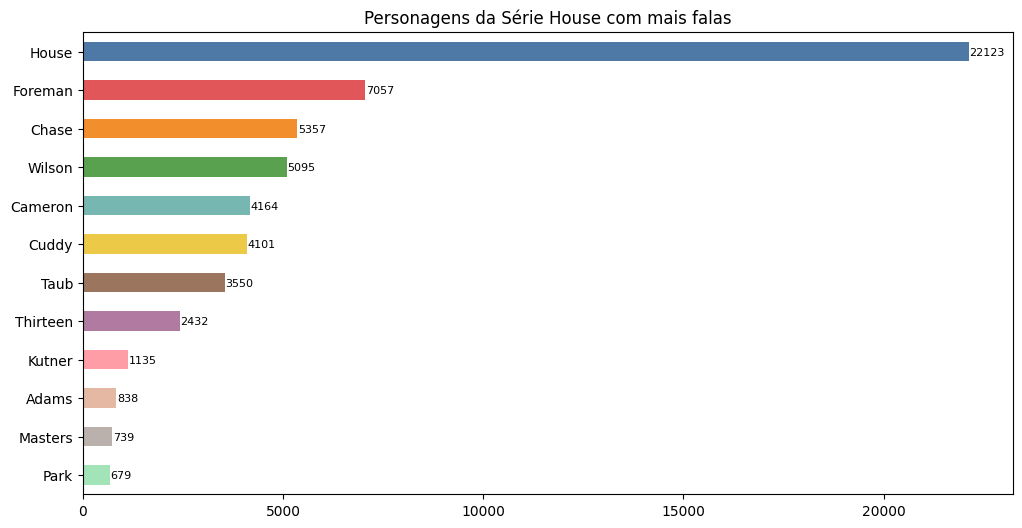

In [ ]:
top_names = df['character'].value_counts().head(12)[::-1]
colors = [cores[c] for c in top_names.index]
ax = top_names.plot.barh(figsize=(12, 6), color=colors, title='Personagens da Série House com mais falas');

# Adiciona o número de falas na frente de cada barra
for i, v in enumerate(top_names):
    ax.text(v + 10, i - 0.1, str(v), color='black', fontsize=8)

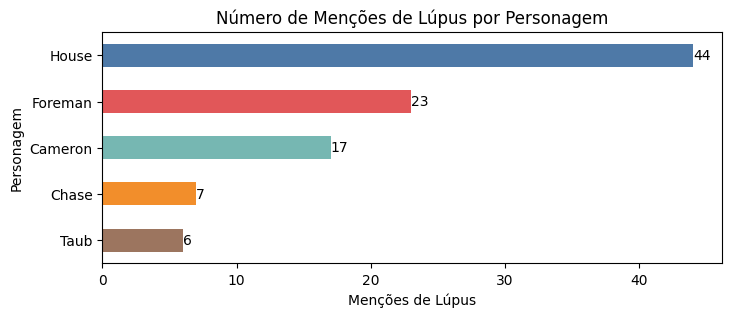

In [ ]:
lupus_mentions = df[df['transcript'].str.contains("lupus", na=False, case=False)]
mentions_by_character = lupus_mentions['character'].value_counts().head(5)[::-1]
colors = [cores[c] for c in mentions_by_character.index]
ax = mentions_by_character.plot.barh(figsize=(8, 3), color=colors,
                                  title='Número de Menções de Lúpus por Personagem')
ax.set_xlabel("Menções de Lúpus")
ax.set_ylabel("Personagem")
ax.bar_label(ax.containers[0]);

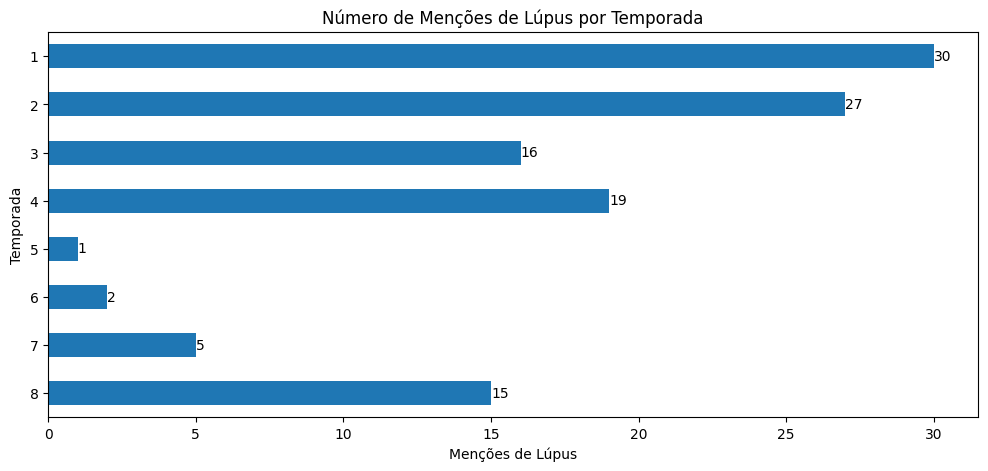

In [ ]:
mentions_by_season = lupus_mentions['season'].value_counts().sort_index(ascending=False)
ax = mentions_by_season.plot.barh(figsize=(12, 5),
                                  title='Número de Menções de Lúpus por Temporada')
ax.set_xlabel("Menções de Lúpus")
ax.set_ylabel("Temporada")
ax.bar_label(ax.containers[0]);

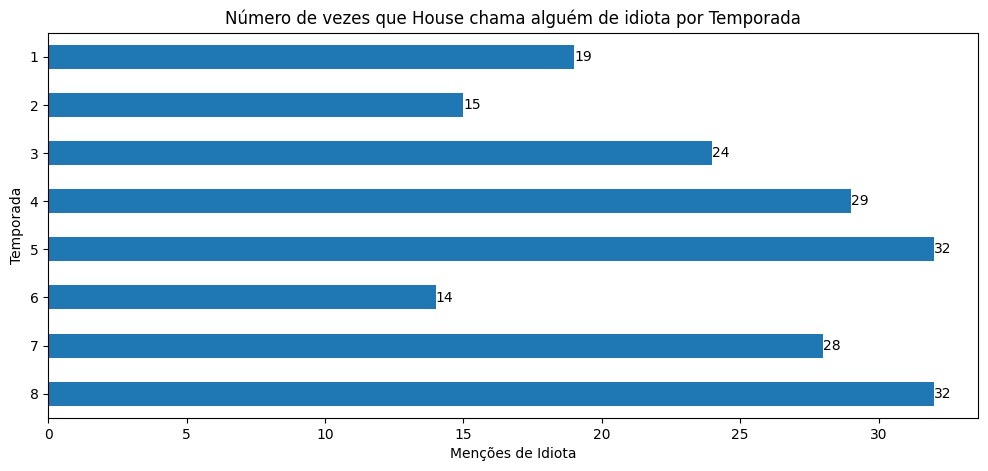

In [ ]:
idiot_mentions = df[(df['transcript'].str.contains("idiot", na=False, case=False)) & (df['character'] == 'House')]
idiots_by_season = idiot_mentions['season'].value_counts().sort_index(ascending=False)
ax = idiots_by_season.plot.barh(figsize=(12, 5), title='Número de vezes que House chama alguém de idiota por Temporada')
ax.set_xlabel("Menções de Idiota")
ax.set_ylabel("Temporada")
ax.bar_label(ax.containers[0]);

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy

def plot_wordcloud(df, season_number, n_palavras=20):
    
    # Filtra os dados da temporada selecionada
    df_season = df[df['season'] == season_number]
    
    # Concatena todos os transcripts em uma única string
    text = ' '.join(df_season['transcript'])

    # stopwords em inglês
    stop_words = stopwords.words('english')

    lemmatizer = WordNetLemmatizer()

    # Processa o texto com o modelo spaCy
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)

    # Filtra apenas os substantivos, adjetivos e nomes próprios
    words = [token.text for token in doc if token.pos_ in ['NOUN', 'ADJ', 'PROPN']]

    #words_filtered = [word for word in words if word.isalpha() and word not in stop_words]
    words_filtered = [lemmatizer.lemmatize(token) for token in words if token.isalpha() and token.lower() not in stop_words]
    
    # Cria a nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=n_palavras).generate(' '.join(words_filtered))
    
    # Exibe a nuvem de palavras
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    plt.show()

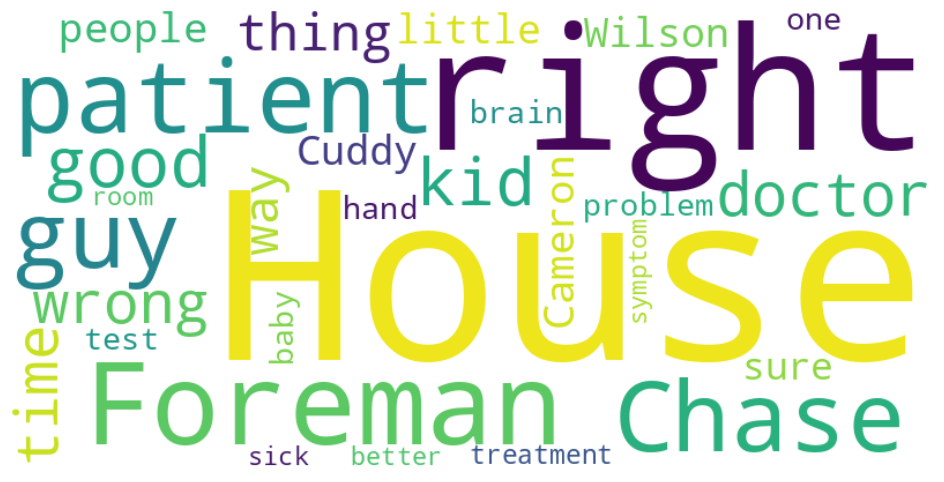

In [ ]:
plot_wordcloud(df, 1, 30)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import spacy

# Carrega o modelo em inglês do spaCy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def plot_word_freq(df, seasons, n=10):
    # Filtra as temporadas desejadas
    df_seasons = df[df['season'].isin(seasons)]
    
    # Junta os textos de cada episódio da temporada selecionada
    episodes_text = df_seasons.groupby(['season', 'episode'])['transcript'].apply(lambda x: ' '.join(x)).reset_index()
    
    # Função para processar o texto e extrair os substantivos, adjetivos e nomes próprios
    def extract_nouns_adj(text):
        doc = nlp(text)
        return [token.text for token in doc if token.pos_ in ['NOUN', 'ADJ', 'PROPN']]

    # Aplica a função para extrair os substantivos, adjetivos e nomes proprios de cada episódio
    episodes_text['nouns_adj_propn'] = episodes_text['transcript'].apply(extract_nouns_adj)
    
    # Une as listas de palavras de todos os episódios em uma única lista
    words = [word for episode_words in episodes_text['nouns_adj_propn'].tolist() for word in episode_words]

    # stopwords em inglês
    stop_words = stopwords.words('english')

    lemmatizer = WordNetLemmatizer()

    # Remove as stopwords e lematiza
    words_filtered = [lemmatizer.lemmatize(token) for token in words if token.isalpha() and token.lower() not in stop_words]
    
    # Conta as palavras e pega as N mais frequentes
    word_freq = dict(Counter(words_filtered).most_common(n))

    # Ordena as palavras em ordem decrescente de frequência
    word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))
    
    # Cria um gráfico de barras das palavras mais frequentes
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.barh(list(word_freq.keys()), list(word_freq.values()))
    plt.gca().invert_yaxis()
    for i, v in enumerate(word_freq.values()):
      ax.text(v, i, str(v), color='blue', fontsize=8)
    plt.title(f'Palavras Mais Frequentes - Temporadas {", ".join(str(season) for season in seasons)}')
    plt.xlabel('Frequência')
    plt.ylabel('Palavras')
    
    plt.show()

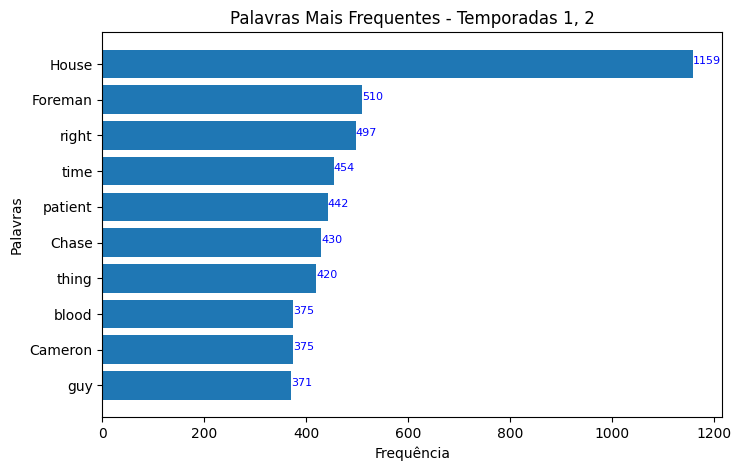

In [ ]:
# Plota as 10 palavras mais frequentes das temporadas 1 e 2
plot_word_freq(df, [1,2], n=10)

In [ ]:
import seaborn as sns

def plot_num_caracteres_box_plot(df, seasons):
    df_seasons = df[df['season'].isin(seasons)].copy()
    df_seasons['char_count'] = df_seasons['transcript'].apply(lambda x: len(x))

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.boxplot(x='season', y='char_count', data=df_seasons, ax=ax)
    ax.set_xlabel('Temporada')
    ax.set_ylabel('Número de Caracteres')
    ax.set_title('Distribuição do Número de Caracteres por Temporada')
    
    plt.show()

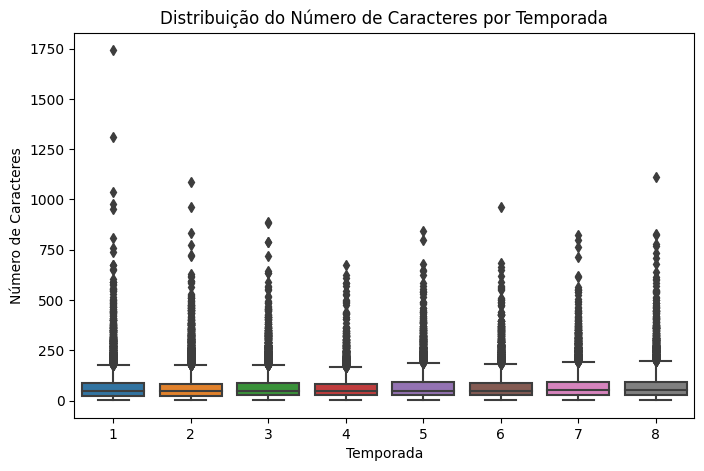

In [ ]:
plot_num_caracteres_box_plot(df, [1,2,3,4,5,6,7,8])

**`Episódios`**

In [ ]:
# Número de episódios na Série House
num_episodes = df['episode'].nunique()
print("Número de episódios únicos:", num_episodes)

Número de episódios únicos: 177


In [ ]:
# Número de episódios na Série House
num_episodes = df['num_episode'].nunique()
print("Número de episódios únicos:", num_episodes)

Número de episódios únicos: 177


In [ ]:
def count_episodes_by_character(df, character):
    num_episodes = df.loc[df['character'].str.lower() == character.lower(), 'num_episode'].nunique()
    
    return num_episodes

In [ ]:
num_episodes = count_episodes_by_character(df, 'house')

print("Número de episódios em que House participou:", num_episodes)

Número de episódios em que House participou: 177


In [ ]:
def top_n_characters(df, n):
    character_counts = df.groupby('character')['num_episode'].nunique().sort_values(ascending=False)
    top_characters = character_counts.index[:n].tolist()
    top_counts = character_counts.values[:n].tolist()
    
    return top_characters, top_counts

In [ ]:
top_characters, top_counts = top_n_characters(df, 5)

for i in range(len(top_characters)):
 print(top_characters[i], "  \t", top_counts[i], " episódio(s).")

House   	 177  episódio(s).
Wilson   	 171  episódio(s).
Foreman   	 169  episódio(s).
Chase   	 165  episódio(s).
Cuddy   	 152  episódio(s).


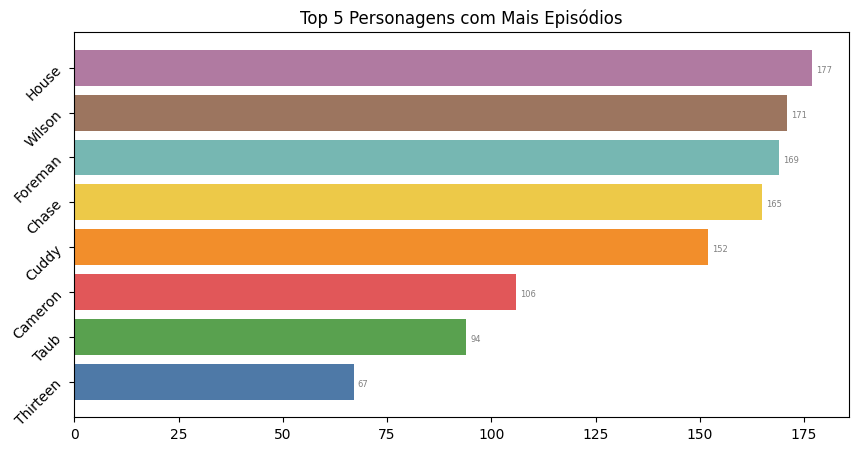

In [ ]:
import matplotlib.pyplot as plt

# Executa a função para obter os top 8 personagens e contagens de episódios correspondentes
top_characters, top_counts = top_n_characters(df, 8)

# Define cores para os personagens
colors = [cores[c] for c in top_characters]

# Ordena os dados em ordem decrescente
top_characters.reverse()
top_counts.reverse()

# Cria um gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(top_characters, top_counts, color=colors)

# Adiciona os valores de contagem acima de cada barra
for i, v in enumerate(top_counts):
    ax.text(v + 1, i - 0.1, str(v), color='gray', fontsize=6)

# Adiciona um título ao gráfico
plt.title("Top 5 Personagens com Mais Episódios")

# Rotaciona os rótulos do eixo y em 45 graus
plt.yticks(rotation=45)

# Mostra o gráfico
plt.show()

A seguir um exemplo de gráfico de dispersão para mostrar o número de personagens por episódio usando a temporada como cor:

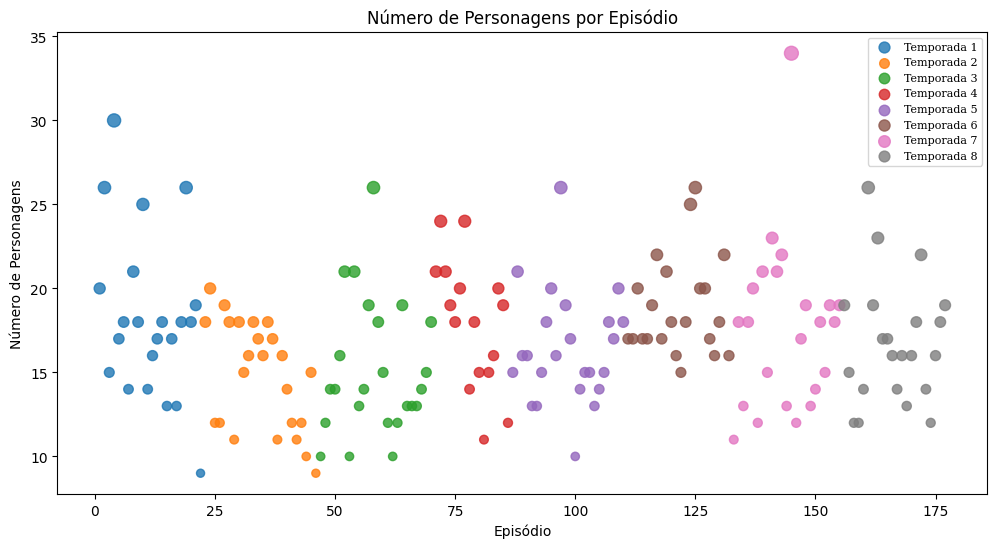

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Agrupa os dados por temporada e episódio, contando o número de personagens em cada episódio
grouped = df.groupby(['season', 'num_episode']).agg({'character': 'nunique'})

# Define o tamanho máximo e mínimo das bolinhas
s_min = 10
s_max = 100

# Calcula o fator de escala
scale_factor = (s_max - s_min) / grouped['character'].max()

# Cria um gráfico de dispersão com o número de personagens por episódio e a cor da temporada
fig, ax = plt.subplots(figsize=(12, 6))
for season in range(1, 9):
    data = grouped.loc[season]

    # Cria um array de tamanhos com base no número de personagens em cada episódio
    sizes = data['character'] * scale_factor + s_min

    ax.scatter(data.index, data['character'], label=f'Temporada {season}', alpha=0.8, s=sizes.loc[data.index])

# Adiciona um título ao gráfico e legendas para os eixos
plt.title('Número de Personagens por Episódio')
plt.xlabel('Episódio')
plt.ylabel('Número de Personagens')

# Definindo a fonte e o tamanho da fonte da legenda
prop = fm.FontProperties(size=8, family='serif')

# Adiciona uma legenda para as cores
plt.legend(loc='upper right',  prop=prop)

# Mostra o gráfico
plt.show()

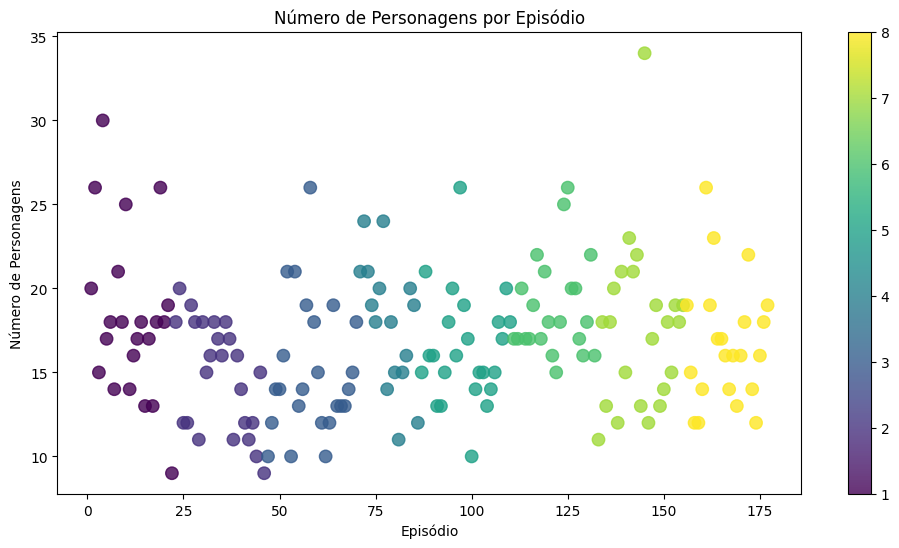

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupa os dados por temporada e episódio, contando o número de personagens em cada episódio
grouped = df.groupby(['season', 'num_episode']).agg({'character': 'nunique'})

# Prepara os dados para o gráfico de dispersão
x = grouped.reset_index()['num_episode']
y = grouped.reset_index()['character']
c = grouped.reset_index()['season']

# Cria um gráfico de dispersão com o número de personagens por episódio e a cor da temporada
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(x, y, c=c, cmap='viridis', alpha=0.8, s=80)

# Adiciona um título ao gráfico e legendas para os eixos
plt.title('Número de Personagens por Episódio')
plt.xlabel('Episódio')
plt.ylabel('Número de Personagens')

# Adiciona uma legenda para as cores
plt.colorbar(scatter)

# Mostra o gráfico
plt.show()

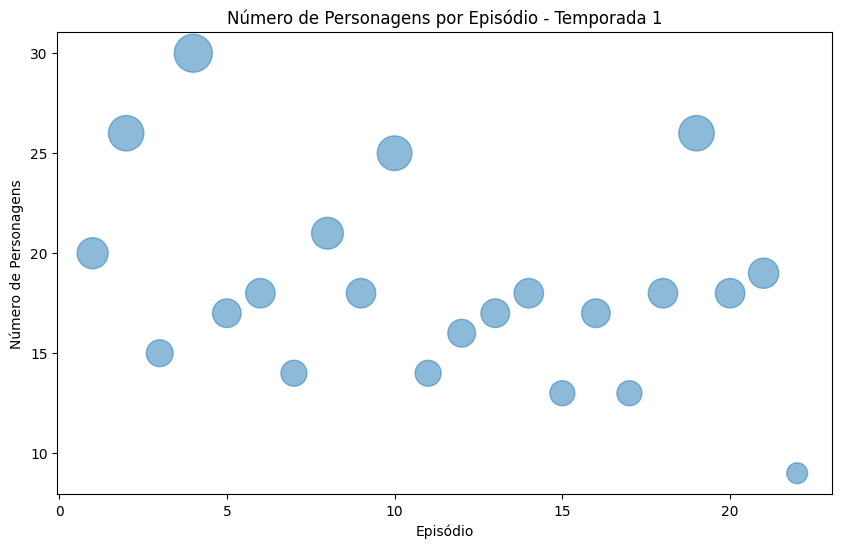

In [ ]:
import matplotlib.pyplot as plt

# Filtrando os dados da temporada 1
df_season = df[df['season'] == 1]

# Agrupando pelo número do episódio
df_grouped = df_season.groupby('num_episode')['character'].nunique().reset_index()

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(x=df_grouped['num_episode'], y=df_grouped['character'], alpha=0.5, s=df_grouped['character']*25)
plt.title('Número de Personagens por Episódio - Temporada 1')
plt.xlabel('Episódio')
plt.ylabel('Número de Personagens')
plt.show()

In [ ]:
import pandas as pd

# Agrupa os dados por temporada e episódio, contando o número de personagens em cada episódio
grouped = df.groupby(['season', 'num_episode']).agg({'character': 'nunique'})
grouped

character
season num_episode           
1      1                   20
       2                   26
       3                   15
       4                   30
       5                   17
...                       ...
8      173                 14
       174                 12
       175                 16
       176                 18
       177                 19

[177 rows x 1 columns]

In [ ]:
import pandas as pd

def num_personagens_por_episodio(df, season):
    # Filtra os dados pela temporada desejada
    df_season = df[df['season'] == season]
    
    # Agrupa os dados pelo episódio e conta o número de personagens em cada episódio
    df_grouped = df_season.groupby('num_episode')['character'].nunique().reset_index()
    
    # Retorna o dataframe com o número de personagens em cada episódio
    return df_grouped

In [ ]:
# Número episódios em uma determinada temporada
season_number = 1 
episode_count = num_personagens_por_episodio(df, season_number)

print(episode_count)

    num_episode  character
0             1         20
1             2         26
2             3         15
3             4         30
4             5         17
5             6         18
6             7         14
7             8         21
8             9         18
9            10         25
10           11         14
11           12         16
12           13         17
13           14         18
14           15         13
15           16         17
16           17         13
17           18         18
18           19         26
19           20         18
20           21         19
21           22          9


In [ ]:
import pandas as pd

def num_personagens_por_episodio(df, temporadas):
    # Filtra os dados para incluir apenas as temporadas selecionadas
    df_seasons = df[df['season'].isin(temporadas)]
    
    # Agrupa os dados por temporada e episódio, contando o número de personagens em cada episódio
    grouped = df_seasons.groupby(['season', 'num_episode']).agg({'character': 'nunique'}).reset_index()
    
    return grouped

In [ ]:
temporadas = [1, 2, 3]
num_personagens_por_episodio(df, temporadas)

,season,num_episode,character
0,1,1,20
1,1,2,26
2,1,3,15
3,1,4,30
4,1,5,17
...,...,...,...
65,3,66,13
66,3,67,13
67,3,68,14
68,3,69,15


In [ ]:
import matplotlib.pyplot as plt

def plot_transcriptions(df, character, seasons):
    # Filtra as temporadas e personagem desejados
    df_filtered = df[(df['character'] == character) & (df['season'].isin(seasons))]
    
    # Conta o número de transcrições de cada episódio
    df_transcriptions = df_filtered.groupby(['season', 'num_episode']).size().reset_index(name='count')

    # Define um dicionário de cores para cada temporada
    color_dict = {season: color for season, color in zip(seasons, plt.cm.tab10(range(len(seasons))))}
    
    # Cria uma lista de cores para cada ponto no gráfico
    colors = [color_dict[season] for season in df_transcriptions['season']]

    # Cria o gráfico de dispersão
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df_transcriptions['num_episode'], df_transcriptions['count'], c=colors, alpha=0.6, s=df_transcriptions['count'])

     # Define as legendas e o título
    ax.set_xlabel('Episódio')
    ax.set_ylabel('Número de Falas')
    ax.set_title(f'Número de Falas para {character.capitalize()} nas Temporadas {", ".join(str(season) for season in seasons)}')

    ax.axhline(y=100, color='gray', linestyle='--')
    
    # Mostra o gráfico
    plt.show()

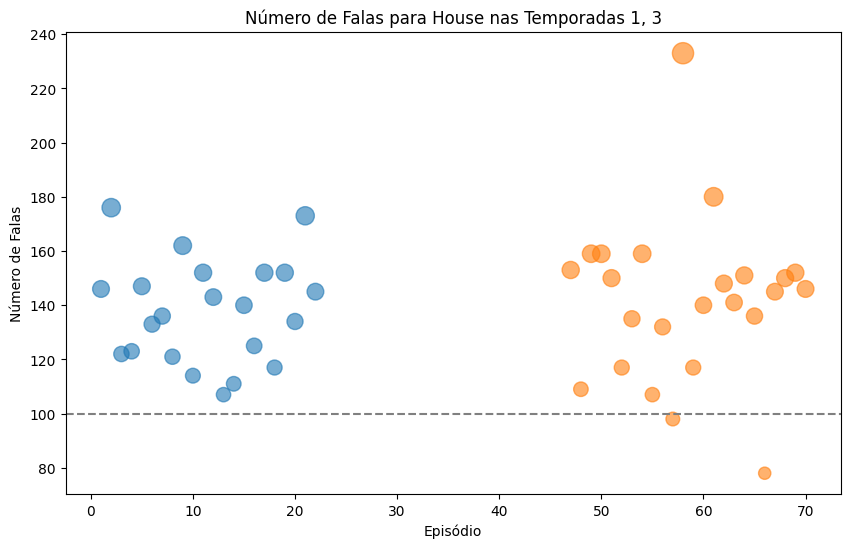

In [ ]:
# personagem House nas temporadas 1 e 3
plot_transcriptions(df, 'House', [1, 3])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_num_caracteres(df, seasons):
    df_seasons = df[df['season'].isin(seasons)].copy()
    df_seasons['char_count'] = df_seasons['transcript'].apply(lambda x: len(x))

    fig, ax = plt.subplots(figsize=(10, 5))
    for i, season in enumerate(seasons):
        df_season = df_seasons[df_seasons['season'] == season]
        ax.scatter(df_season['num_episode'], df_season['char_count'], label=f'Temporada {season}', alpha=0.7, edgecolors='none', c=[f'C{i}'])
    
    ax.set_xlabel('Episódios')
    ax.set_ylabel('Número de Caracteres')
    ax.set_title('Número de Caracteres por Episódio')
    ax.legend()
    
    plt.show()

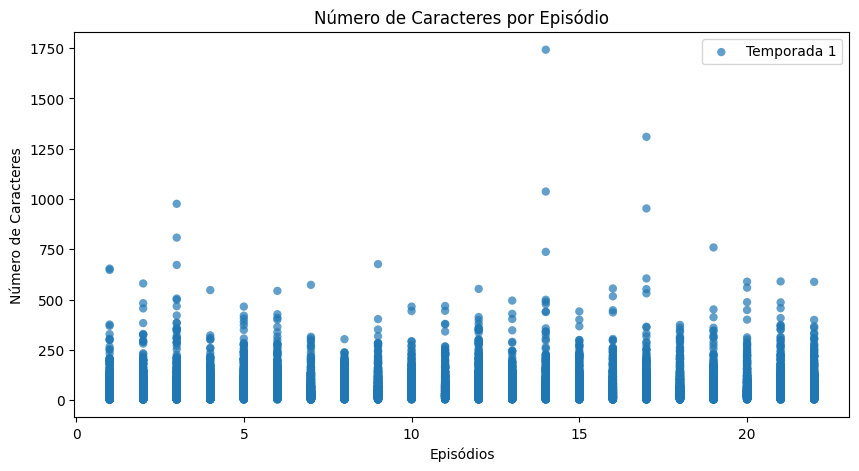

In [ ]:
plot_num_caracteres(df, [1])

In [ ]:
def plot_num_caracteres_personagem(df, character, seasons):
    df_character = df[df['character'].str.lower() == character.lower()].copy()
    df_character = df_character[df_character['season'].isin(seasons)].copy()
    df_character['char_count'] = df_character['transcript'].apply(lambda x: len(x))

    fig, ax = plt.subplots(figsize=(12, 6))
    for i, season in enumerate(seasons):
        df_season = df_character[df_character['season'] == season]
        ax.scatter(df_season['num_episode'], df_season['char_count'], s=50, label=f'Temporada {season}', alpha=0.5, edgecolors='none', c=[f'C{i}'])
    
    ax.set_xlabel('Episódios')
    ax.set_ylabel('Número de Caracteres')
    ax.set_title(f'Número de Caracteres por Episódio para o Personagem {character}')
    ax.legend()

    plt.show()

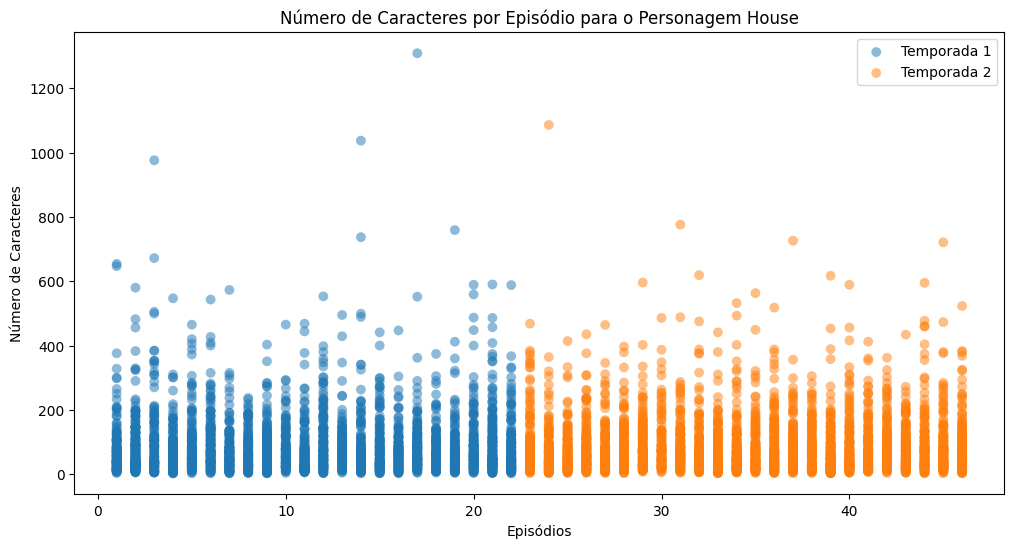

In [ ]:
plot_num_caracteres_personagem(df, 'House', [1,2])